In [1]:
# This scripts generates all 7 figures of the manuscript 

In [2]:
# Import Libraries needed for the Analyses 
import os
import re
import cv2
import sys
import h5py
import struct
import datetime
import numpy as np
import pandas as pd
from tifffile import imread
from scipy.io import readsav
from natsort import natsorted
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

3.15 UT  11.01.2014
(256, 320) (230, 230)


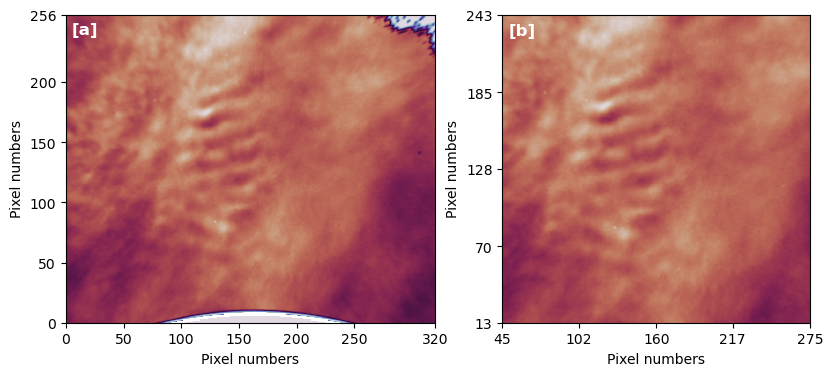

In [3]:
# Figure-1: Sample OH intensity Map

## Function to write timestamp on the image ##
def write_timestamp(image, timestamp, position=(50, 230), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.7, color=(255, 255, 255), thickness=2):
    cv2.putText(image, timestamp, position, font, font_scale, color, thickness, cv2.LINE_AA)

## Function to enhance contrast ##

def enhance_contrast(image, factor=1.5):
    # Convert the numpy array to a PIL Image
    pil_image = Image.fromarray(image)
    
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(pil_image)
    enhanced_image = enhancer.enhance(factor)
    
    # Convert back to numpy array
    return np.array(enhanced_image)

# Specify the path to the image
input_file = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\OH_intensity_map_0315UT_315 UT_11012014.tif"
# Extract the 'secret' header information from USU Tiff images of AMTM OH measurement  
    
f = open(input_file, 'rb')
data = f.read()

UT_hour = struct.unpack("=I", data[255:259])[0]
UT_minute = struct.unpack("=I", data[251:255])[0]
UT_second = struct.unpack("=I", data[247:251])[0]
UT_day = struct.unpack("=I", data[259:263])[0]
UT_month = struct.unpack("=I", data[263:267])[0] + 1.
UT_year = struct.unpack("=I", data[267:271])[0] + 1900.
Exposure = struct.unpack("=f", data[299:303])[0]
latitude = round(struct.unpack("=f", data[370:374])[0], 2)
longitude = round(struct.unpack("=f", data[374:378])[0], 2)
site = data[382:396].decode().strip()
Imtime = round(UT_hour + (UT_minute / 60.0) + (UT_second / 3600.0), 2)  ## Keeping the time upto second decimal point
Imdate = "{:02d}.{:02d}.{:04d}".format(int(UT_day), int(UT_month), int(UT_year))
timestamp = str(Imtime)+' UT '
print(timestamp, Imdate)

# Read the .tif image
im = imread(input_file)

# Convert the image to an array
im_array = np.array(im)
im_array = im_array.astype(float)  # Convert the array to float type to accommodate NaN values
im_array[im_array > 60000] = np.nan  # Replace 65535 with NaN

# Optionally, add a timestamp
image = im_array
image1 = im_array[13:243, 45:275]                         # Taking the image of 222 X 222 around the centre (160,128) of the smoothed image
print(im_array.shape, image1.shape)

# Define the original start positions of the cropped image1
x_start = 45
y_start = 13

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns, each figure is 5x5
plt.rcParams.update({'font.size': 11})

# Calculate the aspect ratio to maintain uniform height
aspect_ratio_image = image.shape[0] / image.shape[1]
aspect_ratio_image1 = image1.shape[0] / image1.shape[1]

# Plot the first image
axes[0].imshow(image, cmap='twilight', vmin=0, vmax=27000, origin='lower', aspect='equal')
axes[0].set_xlim([0, 320])
axes[0].set_ylim([0, 256])
axes[0].set_xlabel('Pixel numbers')
axes[0].set_ylabel('Pixel numbers')
axes[0].set_xticks([0, 50, 100, 150, 200, 250, 320])
axes[0].set_yticks([0, 50, 100, 150, 200, 256])
axes[0].text(5, 240, "[a]", weight='bold', fontsize=12, color='white')
axes[0].set_aspect('auto') 
#axes[0].set_aspect(aspect_ratio_image1 / aspect_ratio_image)  # Adjust aspect ratio to match image1

# Plot the second image (image1) with correct labels
axes[1].imshow(image1, cmap='twilight', vmin=0, vmax=27000, origin='lower', aspect='equal')
axes[1].set_xlim([0, image1.shape[1]])  # x-limits based on the cropped image size
axes[1].set_ylim([0, image1.shape[0]])  # y-limits based on the cropped image size

# Adjust the x and y ticks to reflect the original image coordinates
x_ticks = np.linspace(0, image1.shape[1], num=5, dtype=int)
y_ticks = np.linspace(0, image1.shape[0], num=5, dtype=int)
axes[1].set_xticks(x_ticks)
axes[1].set_yticks(y_ticks)

# Set the x and y tick labels to correspond to the original image's pixel numbers
axes[1].set_xticklabels(x_start + x_ticks)
axes[1].set_yticklabels(y_start + y_ticks)

axes[1].set_xlabel('Pixel numbers')
axes[1].set_ylabel('Pixel numbers')
axes[1].text(5, 215, "[b]", weight='bold', fontsize=12, color='white')

# Ensure both plots have the same height
axes[1].set_aspect('equal')#aspect_ratio_image1 / aspect_ratio_image)

#plt.tight_layout(pad=1.0, w_pad=0, h_pad=0.1)
plt.subplots_adjust(wspace=0.1)  # Reduce the space between the subplots to a minimum

# Show the figure with both subplots
plt.show()

## Set the filename for the output file and saving the image
Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_1_sample_OH_intensity_map.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)


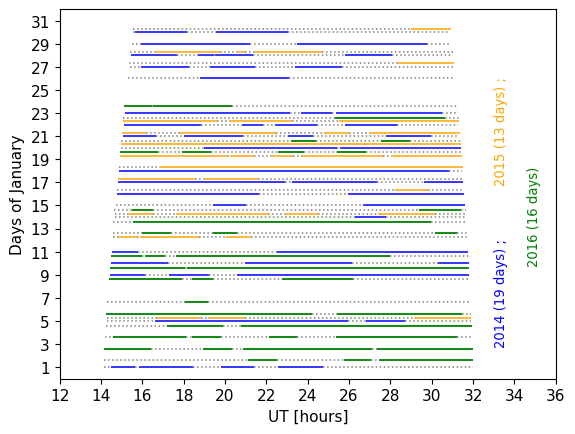

In [4]:
# Figure - 2 : Data-availability for this Paper 

# Initialize the figure
fig, ax = plt.subplots()

# Import the file to be read: data_catalogue

cat_file = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Data_Catalogue_January_2014_2015_2016.txt"

# Read the file: make sure the delimiter in the '.txt' file is uniform across all the rows and columns, else further cleaning up is needed by reading the file as text file first

data_cat = pd.read_csv(cat_file, sep=",", header=0, names=["Date", "2014", "2015", "2016"], skiprows = 2)

# To remove the trailing/leading spaces in the coloumn: perform for each column or use 'applymap' function

data_cat['2014'] = data_cat['2014'].str.strip()
data_cat['2015'] = data_cat['2015'].str.strip()
data_cat['2016'] = data_cat['2016'].str.strip()
#data_cat = data_cat.applymap(lambda x: x.strip() if isinstance(x, str) else x)    #This applies the strip() function to every element in the DataFrame. If the element is a string (str), it will remove its leading and trailing spaces. If the element is not a string (for instance, it could be a number), it will leave the element unchanged.

# Read/break the data catalogue to 3 data frames corresponding to each year 

Cat_2014 = data_cat[['Date', '2014']]
Cat_2015 = data_cat[['Date', '2015']]
Cat_2016 = data_cat[['Date', '2016']]

# Remove rows where first column starts with '#'

Cat_2014 = Cat_2014[~Cat_2014['2014'].str.startswith('#')]
Cat_2015 = Cat_2015[~Cat_2015['2015'].str.startswith('#')]
Cat_2016 = Cat_2016[~Cat_2016['2016'].str.startswith('#')]

# Image number to UT (hours) conversion: reading all the textfiles having these information as list

# ================================================================================================= #
# ::: 2014 ::: Arrays for X & Y-axes of the plot == Time duration of good images vs Days of January
#print(len(Img_Time_2014))

# Iterate over rows in df_good_images
for index, row in Cat_2014.iterrows():
    days = int(row['Date'])
    doj = days
    #print(doj)
    #print(days)
    ranges = row['2014'].split(';')
    
    # Get the exact file name from the days of January details to match text files for Image Timestamp information
    date1 = datetime.datetime(year=2014, month=1, day=days)
    date2 = date1 + datetime.timedelta(days=1)
    date_str = date1.strftime('Jan%d') + '-' + date2.strftime('%d_%Y')   
    file_name = date_str+'.txt'
    #print(days, '::::::::', date_str, '::::::::', ranges)
    
    # Reading required text files in the directory 'Img_Time_2014'
    
    file_to_be_read = os.path.join(r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Image_numbers_to_UT_times", file_name)
    Img_time_file = pd.read_csv(file_to_be_read, sep=r'\s+')   # '\s+' takes care of multiple spaces as separtor between columns
    
    img_nums = Img_time_file['Image_Number']
    img_times = Img_time_file['UT(Hrs)']
    
    # Convert these Pandas dataframe to np arrays to be used in np.where functions
    img_nums = np.array(img_nums)
    img_times = np.array(img_times)  
    
    ## Generate image number ranges which are not good in a day:: they will be plotted as grey dotted lines
    
    min_val = np.min(img_times)
    max_val = np.max(img_times)
    bad_img_arr1 = [min_val]
    bad_img_arr2 = []
        
    # loop over all the ranges of good_images in the array 'ranges'
    for r in ranges:                                 
        # Split the range on the '-' character
        start, end = map(int, r.split('-'))   # start & end are the extreme end image numbers of the ranges
        if end > np.max(img_nums): end = np.max(img_nums)   # Sometimes 'end' number can be more than available images due to error

        # Retrieve times corresponding to these 'start' & 'end' image numbers 
        img_time1 = img_times[np.where(img_nums == start)][0]
        img_time2 = img_times[np.where(img_nums == end)][0]
                
        # Draw blue line
        ax.hlines(doj, img_time1, img_time2, colors='#0000FF', linewidth = 1.1)
        
        # Ranges of bad_images to be represented by grey_dotted lines        
        bad_img_arr2.append(img_times[np.where(img_nums == start)][0])
        bad_img_arr1.append(img_times[np.where(img_nums == end)][0])

    # Add the max value to array2
    bad_img_arr2.append(max_val)
    
    # Loop through pairs of bad_img_arr1 and bad_img_arr2
    for gt1, gt2 in zip(bad_img_arr1, bad_img_arr2):
        ax.hlines(doj, gt1, gt2, colors='grey', linestyles='dotted', linewidth=1.1)

# ================================================================================================= #
# ::: 2015 ::: Arrays for X & Y-axes of the plot == Time duration of good images vs Days of January
#print(len(Img_Time_2015))

# Iterate over rows in df_good_images
for index, row in Cat_2015.iterrows():
    days = int(row['Date'])
    doj = days
    ranges = row['2015'].split(';')
    # Get the exact file name from the days of January details to match text files for Image Timestamp information
    date1 = datetime.datetime(year=2015, month=1, day=days)
    date2 = date1 + datetime.timedelta(days=1)
    date_str = date1.strftime('Jan%d') + '-' + date2.strftime('%d_%Y')   
    file_name = date_str+'.txt'
    #print(days, '::::::::', date_str, '::::::::', ranges)
    
    # Reading required text files in the directory 'Img_Time_2015'
    
    file_to_be_read = os.path.join(r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Image_numbers_to_UT_times", file_name)
    Img_time_file = pd.read_csv(file_to_be_read, sep=r'\s+')   # '\s+' takes care of multiple spaces as separtor between columns
    
    img_nums = Img_time_file['Image_Number']
    img_times = Img_time_file['UT(Hrs)']
    
    # Convert these Pandas dataframe to np arrays to be used in np.where functions
    img_nums = np.array(img_nums)
    img_times = np.array(img_times)  
    
    ## Generate image number ranges which are not good in a day:: they will be plotted as grey dotted lines
    
    min_val = np.min(img_times)
    max_val = np.max(img_times)
    bad_img_arr1 = [min_val]
    bad_img_arr2 = []
    
    # loop over all the ranges of good_images in the array 'ranges'
    for r in ranges:
        # Split the range on the '-' character
        start, end = map(int, r.split('-'))   # start & end are the extreme end image numbers of the ranges
        if end > np.max(img_nums): end = np.max(img_nums)   # Sometimes 'end' number can be more than available images due to error
        
        # Retrieve times corresponding to these 'start' & 'end' image numbers 
        img_time1 = img_times[np.where(img_nums == start)][0]
        img_time2 = img_times[np.where(img_nums == end)][0]
        # print(doj,img_time1, img_time2)
        
        ax.hlines(doj+0.3, img_time1, img_time2, colors='#FFA500', linewidth = 1.1)
        
        # Ranges of bad_images to be represented by grey_dotted lines        
        bad_img_arr2.append(img_times[np.where(img_nums == start)][0])
        bad_img_arr1.append(img_times[np.where(img_nums == end)][0])

    # Add the max value to array2
    bad_img_arr2.append(max_val)
    
    # Loop through pairs of bad_img_arr1 and bad_img_arr2
    for gt1, gt2 in zip(bad_img_arr1, bad_img_arr2):
        ax.hlines(doj+0.3, gt1, gt2, colors='grey', linestyles='dotted', linewidth=1.1)

# ================================================================================================= #
# ::: 2016 ::: Arrays for X & Y-axes of the plot == Time duration of good images vs Days of January
#print(len(Img_Time_2016))

# Iterate over rows in df_good_images
for index, row in Cat_2016.iterrows():
    days = int(row['Date'])
    doj = days
    ranges = row['2016'].split(';')
    # Get the exact file name from the days of January details to match text files for Image Timestamp information
    date1 = datetime.datetime(year=2016, month=1, day=days)
    date2 = date1 + datetime.timedelta(days=1)
    date_str = date1.strftime('Jan%d') + '-' + date2.strftime('%d_%Y')   
    file_name = date_str+'.txt'
    #print(days, '::::::::', date_str, '::::::::', ranges)
    
    # Reading required text files in the directory 'Img_Time_2015'
    
    file_to_be_read = os.path.join(r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Image_numbers_to_UT_times", file_name)
    Img_time_file = pd.read_csv(file_to_be_read, sep=r'\s+')   # '\s+' takes care of multiple spaces as separtor between columns
    
    img_nums = Img_time_file['Image_Number']
    img_times = Img_time_file['UT(Hrs)']
    
    # Convert these Pandas dataframe to np arrays to be used in np.where functions
    img_nums = np.array(img_nums)
    img_times = np.array(img_times)  
    
    ## Generate image number ranges which are not good in a day:: they will be plotted as grey dotted lines
    
    min_val = np.min(img_times)
    max_val = np.max(img_times)
    bad_img_arr1 = [min_val]
    bad_img_arr2 = []
    
    # loop over all the ranges of good_images in the array 'ranges'
    for r in ranges:
        # Split the range on the '-' character
        start, end = map(int, r.split('-'))   # start & end are the extreme end image numbers of the ranges
        if end > np.max(img_nums): end = np.max(img_nums)   # Sometimes 'end' number can be more than available images due to error
        
        # Retrieve times corresponding to these 'start' & 'end' image numbers 
        img_time1 = img_times[np.where(img_nums == start)][0]
        img_time2 = img_times[np.where(img_nums == end)][0]
        #print(doj,img_time1, img_time2)
        ax.hlines(doj+0.6, img_time1, img_time2, colors = '#008000', linewidth=1.3)#'green')
        # Ranges of bad_images to be represented by grey_dotted lines        
        bad_img_arr2.append(img_times[np.where(img_nums == start)][0])
        bad_img_arr1.append(img_times[np.where(img_nums == end)][0])

    # Add the max value to array2
    bad_img_arr2.append(max_val)
    
    # Loop through pairs of bad_img_arr1 and bad_img_arr2
    for gt1, gt2 in zip(bad_img_arr1, bad_img_arr2):
        ax.hlines(doj+0.6, gt1, gt2, colors='grey', linestyles='dotted', linewidth=1.1)
ax.set_xlabel('UT [hours]')
ax.set_ylabel('Days of January')
ax.set_xlim([12, 36])
ax.set_ylim([0, 32])
ax.set_yticks(range(1, 33,2))
ax.set_xticks(range(12, 38,2))
ax.text(33, 3, "2014 (19 days) ;", fontsize = 9.5, color = '#0000FF', rotation = 90)
ax.text(33, 17, "2015 (13 days) ;", fontsize = 9.5, color = '#FFA500', rotation = 90)
ax.text(34.6, 10, "2016 (16 days) ", fontsize = 9.5, color = '#008000', rotation = 90)

# Add these lines before plt.show()
#legend_elements = [Line2D([0], [0], color='#0000FF', lw=2, label=f'2014 ({len(Img_Time_2014)})'),
#                   Line2D([0], [0], color='#FFA500', lw=2, label=f'2015 ({len(Img_Time_2015)})'),
#                   Line2D([0], [0], color='#008000', lw=2, label=f'2016 ({len(Img_Time_2016)})')]
#ax.legend(handles=legend_elements, loc='upper right')
plt.show()

## Set the filename for the output file and saving the image
Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_2_good_images_availability.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)

(301, 301)


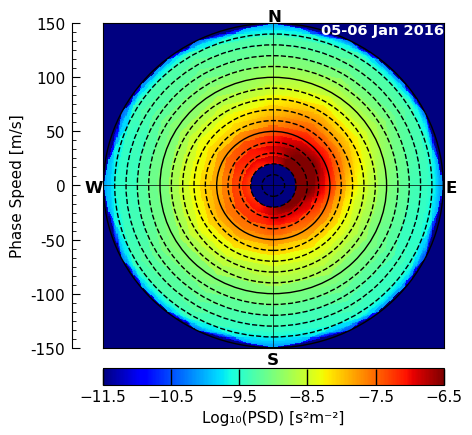

In [5]:
## ==================== GW speeds and Angle of propagation information needed for visualisations of MT results ============== ## 

Vp_GW = np.arange(20, 160, 20)      # Speed domains for quantifications
Phi_GW = np.arange(0, 360, 45)      # Propagation directions for quantifications

x = np.arange(-150.,151.,1)
y = np.arange(-150.,151.,1)
x0 = np.zeros(301)
y0 = np.zeros(301)  
R = np.zeros((301,301))
Phi = np.zeros((301,301))
X,Y = np.meshgrid(x,y)

j = 0
k = 0
for j in range(len(x)):
    for k in range(len(y)):
        R[j,k] = np.sqrt((x[j])**2+(y[k])**2)
        theta = np.arctan2(y[k], x[j])
        theta_deg = np.degrees(theta)
        # Add 360 degrees if the angle is negative
        if theta_deg < 0: theta_deg += 360
        Phi[j,k] = theta_deg
        #print(x[j],   y[k],    Phi[j,k])

## ========== M-Transform output to plot =========== ##

GW_file = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Daily Averaged M-Transform Spectra\Jan05-06_2016.npy"

GW_data = np.load(GW_file)
GW_spectra = np.transpose(GW_data)       # !!! IDL generated 2D array has (columns, row) structure by Python reads 2D array as (rows, columns)


print(GW_spectra.shape)
#sys.exit()

#!!! The speeds less than 20 m/s are contaminated by the movement of Milkyway over the course of observation; therefore the spectral power for this part of the GW_spectra is being replaces with zero values

R_lt20 = np.where(R <= 20)              # indices of GW_Spectra where speeds are less than or equal to 20 m/s
# Replace values in GW_Spectra where R <= 20
GW_spectra[R_lt20] = -100.0            # GW_spectra has logarithmic values and they are plotted in colorscale; so instead of '0', '-100' has been used to be properly represented in the standard scales of M-Transform outputs  

# Figure to visualise M-Transform Result

fig, ax = plt.subplots(figsize=(4.4, 4.7))

pcm = ax.pcolormesh(X, Y, GW_spectra, cmap='jet', vmin=-11.5, vmax=-6.5)
ax.plot(x0, y, color='k', lw='0.5')
ax.plot(x, y0, color='k', lw='0.5')
ax.set_yticks([])
ax.set_xticks([])
#ax.set_xlabel('Phase Speed [m/s]')
#ax.set_ylabel('Phase Speed [m/s]')
ax.text(152, -6, "E", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-5,152, "N", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-167,-6, "W", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-6,-165, "S", weight = 'bold', fontsize = 12, color = 'black')
ax.text(42,140, "05-06 Jan 2016", weight = 'bold', fontsize = 10.5, color = 'white')

# Define secondary Y-axis for phase speed
secax = ax.secondary_yaxis('left', functions=(lambda x: x, lambda x: x))
secax.spines['left'].set_position(('outward', 22))  # Move axis to the left by 30 points
secax.set_ylabel('Phase Speed [m/s]')
secax.set_yticks([-150, -100, -50, 0, 50, 100, 150])
secax.set_yticklabels(['-150', '-100', '-50', '0', '50', '100', '150'])
secax.tick_params(direction='in', length=6, pad=5)
secax.tick_params(direction='in', length=3, pad=5, which='minor')  # Set minor ticks
# Adding minor ticks with AutoMinorLocator
secax.yaxis.set_minor_locator(AutoMinorLocator(6))  # Set 5 minor ticks between major ticks

circles = [plt.Circle((0, 0), r, color='k', fill=False) for r in [50, 100, 150]]
[ax.add_artist(c) for c in circles]

circles_dashed = [plt.Circle((0, 0), r, linestyle='--', color='k', fill=False) for r in [10, 20, 30, 40, 60, 70, 80, 90, 110, 120, 130, 140]]
[ax.add_artist(c) for c in circles_dashed]

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad = 0.2)
cb = plt.colorbar(pcm, cax=cax, orientation='horizontal')
cb.set_ticks([-11.5, -10.5, -9.5, -8.5, -7.5, -6.5])
cb.set_label('Log\u2081\u2080(PSD) [s\u00b2m\u207B\u00b2]')
cb.ax.tick_params(direction='in', length = 11.7, width = 1, colors='k')

plt.show()

## Set the filename for the output file and saving the image
Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_3_sample_MT_Output.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)

# GW File =  C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Daily Averaged M-Transform Spectra\Jan05-06_2016.npy
# era5_U_File =  C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\era5_winds_for_good_images\05-06_Jan_2016_era5_U_over_ALOMAR.npy
# era5_V_File =  C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\era5_winds_for_good_images\05-06_Jan_2016_era5_V_over_ALOMAR.npy
Figure - 1 (out of 2) : done
Figure-2: (out of 2) done


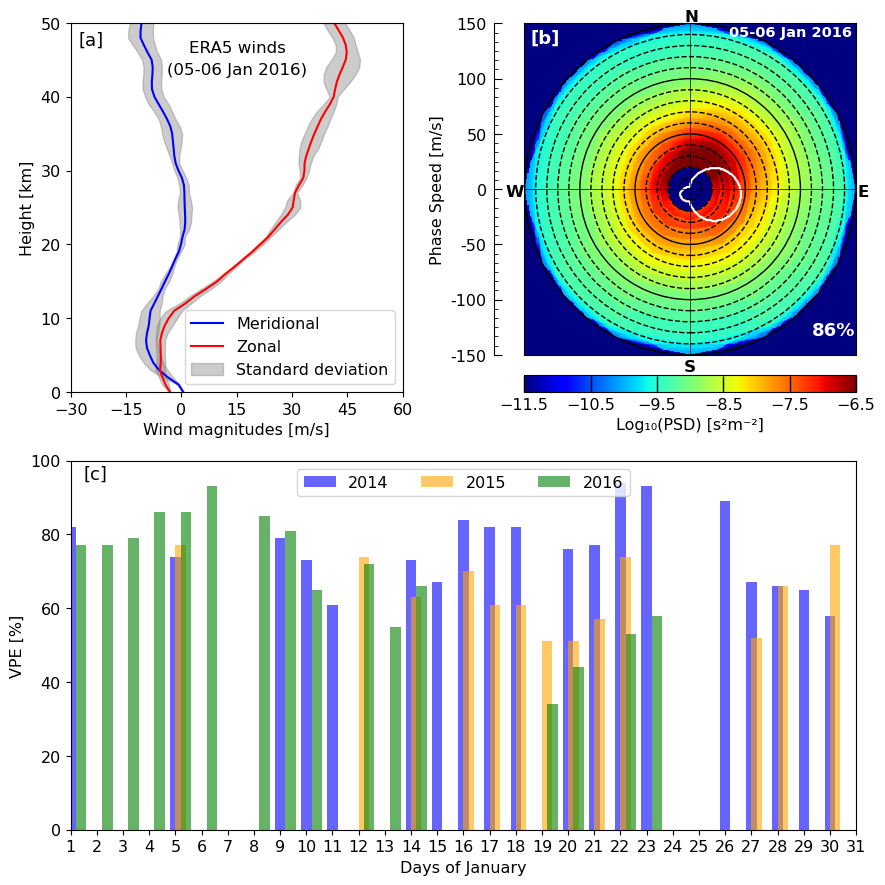

In [6]:
# Figure - 4 : Sample Wind Block Diagram

# This section generates necessary arrays for plotiing M-Transform output & reads the files from the directory

# Genrate arrays to be represented as GW speeds & propagation directions that will be used for visualisations of MT outputs 
Vp_GW = np.arange(20, 160, 20)      # Speed domains for quantifications
Phi_GW = np.arange(0, 360, 45)      # Propagation directions for quantifications

x = np.arange(-150.,151.,1)
y = np.arange(-150.,151.,1)
x0 = np.zeros(301)                  # Centre of circles which represent phase velocities
y0 = np.zeros(301)                  # Centre of circles which represent phase velocities
R = np.zeros((301,301))
Phi = np.zeros((301,301))
X,Y = np.meshgrid(x,y)

j = 0
k = 0
for j in range(len(x)):
    for k in range(len(y)):
        R[j,k] = np.sqrt((x[j])**2+(y[k])**2)
        theta = np.arctan2(y[k], x[j])
        theta_deg = np.degrees(theta)                   # Radian to degree conversion
        # Add 360 degrees if the angle is negative
        if theta_deg < 0: theta_deg += 360              # This will make sure that angles are within 0 to 360 degrees
        Phi[j,k] = theta_deg
        #print(x[j],   y[k],   Phi[j,k])
#sys.exit()
j = 0   # loop variables are set to zero so that they can be used later without any error 
k = 0   # loop variables are set to zero so that they can be used later without any error

## ========== GW & Era5_wind files for nightly_avergaed MT spectra & era5 winds =========== ##

GW_file = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Daily Averaged M-Transform Spectra\Jan05-06_2016.npy"
era5_winds_dir = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\era5_winds_for_good_images" 

## =================== Height values corresponding to 137 model-levels:: required to plot era5_data ================== ##

era5_H = np.loadtxt(r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\era5_winds_for_good_images\Z.txt")
era5_H = era5_H[::-1]       # Values will be increasing order in altitudes


# Generates the array for 05-06 January 2016 : a sample day

# ============== Generating wind-block diagrams this day ================== ##
doj = '05-06'   # day of January (doj) to be used to select the relevant era5 U & V files!!
#print(GW_file, doj)

# M-Transform output of GW Spectra into a numpy array
GW_data = np.load(GW_file)
GW_spectra = np.transpose(GW_data)       # !!! IDL generated 2D array has (column, row) structure by Python reads 2D array as (rows, columns)
# !!! Numpy 2D arrays are (row, column) style but Matplotlib read 2D arrays (column, row) format
# !!! So, for quantification of "GW_data" we will used transposed array "GW_spectra" as we are using numpy arrays "x" & "y"
# !!! But for plotting using  "Matplotlib" we will use "GW_data" or "GW_spectra".T to reorient them into (column, row) index

# The speeds less than 20 m/s are contaminated by the movement of Milkyway over the course of observation; therefore the spectral power for this part of the GW_spectra is being replaces with zero values
R_lt20 = np.where(R <= 20)              # indices of GW_Spectra where speeds are less than or equal to 20 m/s
# Replace values in GW_Spectra where R <= 20
GW_spectra[R_lt20] = -100.0            # GW_spectra has logarithmic values and they are plotted in colorscale; so instead of '0', '-100' has been used to be properly represented in the standard scales of M-Transform outputs  

# Selecting the era5 U & V files for '{doj}' being analysed :: These files have 138 columns: first columns have the 'times' and rest 137 are values at model-levels
era5_U = os.path.join(era5_winds_dir,f"{doj}_Jan_2016_era5_U_over_ALOMAR.npy")
U_data = np.load(era5_U)
U_all = U_data[:,1:139]                      # first Column with Time information is avoided 
U_avg = np.mean(U_all, axis = 0)             # average all the values over time at each model-level 
U_std = np.std(U_all, axis = 0)              # standard deviation of U data

era5_V = os.path.join(era5_winds_dir,f"{doj}_Jan_2016_era5_V_over_ALOMAR.npy")
V_data = np.load(era5_V)
V_all = V_data[:,1:139]                      # first Column with Time information is avoided 
V_avg = np.mean(V_all, axis = 0)             # average all the values over time at each model-level 
V_std = np.std(V_all, axis = 0)              # standard deviation of V data
print('# GW File = ', GW_file)
print('# era5_U_File = ', era5_U)
print('# era5_V_File = ', era5_V)

## These arrays of era5 data are being reversed in order so that they can be plotted against increasing altitudes
U_avg = U_avg[::-1]
V_avg = V_avg[::-1]
U_std = U_std[::-1]
V_std = V_std[::-1]

## Interpolating these values with 1 km resolution for 0 to 50 km altitude range:: then their indices can be used as representative of altitudes
HH = np.arange(0,51)
#print(len(era5_H),len(V_all),len(U_all),len(U_std))
U_int = np.interp(HH, era5_H, U_avg)
V_int = np.interp(HH, era5_H, V_avg)
U_std = np.interp(HH, era5_H, U_std)
V_std = np.interp(HH, era5_H, V_std)
#print(len(HH), len(U_int), len(V_int), len(U_std), len(V_std))
#print(V_int)

# Prepare data for saving. Stack arrays in the format of columns
#data_to_save = np.column_stack((HH, U_int, V_int))

# Save the array to text file with each array as a column
#np.savetxt(r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_Alomar\Analyses_Techniques\Programming_Routines\Subir\Cross-check\output_data.txt", data_to_save, fmt='%g', delimiter=',', header='H,U,V', comments='')


# Analyses for the wind-blocking diagram

x = np.arange(-300/2,301/2,1)
y = np.arange(-300/2,301/2,1)

x0 = np.zeros(301)
y0 = np.zeros(301)  
CH = np.zeros((301,301,51))
Chat = np.zeros((301,301))

m = 0
j = 0
k = 0
for m in range(0,51):
    #print(m,HH[m])
    for j in range(len(x)):
        for k in range(len(y)):
            p = np.sqrt((x[j])**2+(y[k])**2)
            theta = np.arctan2((y[k]),(x[j]))
            CH[j,k,m] = p-(U_int[m]*np.cos(theta)+V_int[m]*np.sin(theta))    # 'U_int' & 'V_int' are the era5 zonal & meridional winds values for the specific period of good images below 50 km
            #print(m,HH[m], x[j], y[k], U_int[m], V_int[m], CH[j,k,m])
            if CH[j,k,m]<=0: CH[j,k,m]=-100000000.0
            #print(CH[j,k,m])
Chat[:,:] = np.sum(CH[:,:,:],axis = 2)
#print(Chat)

# Calculate the spectral power outside the forbidden region

blocked_indices = np.where((Chat <= 0.)) 
blocked_GW_array = (10.0**(GW_spectra[blocked_indices]))*10.0**4           # Values will be plotted in units of (10**-4)
blocked_GW_PSD = np.sum(blocked_GW_array)

all_GW_PSD_array=(10.0**(GW_spectra))*10.0**4                              # Values will be plotted in units of (10**-4)
all_GW_PSD=np.sum(all_GW_PSD_array)

VPP=((all_GW_PSD-blocked_GW_PSD)/all_GW_PSD)*100                           # Vertical propagation probability of GWs
VPP=round(VPP)
#print(VPP)

# This cell generates the figures:: Specify the window size and font size for the figures to be plotted 

plt.rcParams.update({'font.size': 11.5})

# Create the figure and subplots
fig = plt.figure(figsize=(9, 9))
#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))

# Adjust the spacing between the subplots
#fig.subplots_adjust(wspace = 0.1)

## Figure-1:> era5 Zonal(U) & Meridional(V) winds between 0 to 50 km  

#ax = axs[0]
ax =  plt.subplot(2, 2, 1)
ax.plot(V_int, HH, color = 'blue',label = 'Meridional')
ax.fill_betweenx(HH, V_int - V_std, V_int + V_std, color = 'gray', alpha = 0.4)

ax.plot(U_int, HH, color='red',label='Zonal')
ax.fill_betweenx(HH, U_int - U_std, U_int + U_std, color = 'gray', alpha = 0.4, label = 'Standard deviation')
#ax.plot([0,0],[0,50],color = 'black',linestyle = '--')
ax.set_ylim([0,50])
ax.set_xlim([-30,60])
ax.set_xticks([-30,-15,0,15,30,45,60])
ax.set_yticks([0,10,20,30,40,50])
#ax.set_title(f"era5 winds on {doj}Jan{year}")
ax.set_ylabel('Height [km]')
ax.set_xlabel('Wind magnitudes [m/s]')
ax.legend()#loc='upper left')
ax.text(-28,47, "[a]", fontsize = 13, color = 'black')
ax.text(-4,43, "(05-06 Jan 2016)", fontsize = 12, color = 'black')
ax.text(2,46, "ERA5 winds", fontsize = 12, color = 'black')
print('Figure - 1 (out of 2) : done')

## Figure-2:> Wind-block diagram overlayed on M-Transform generated gravity wave spectra: 0 - 50 km

#ax = axs[1]
ax =  plt.subplot(2, 2, 2)
contour = ax.contour(X, Y, Chat.T, levels=[0.0], colors = 'white')
pcm = ax.pcolormesh(X, Y, GW_spectra.T, cmap='jet', vmin=-11.5, vmax=-6.5)
ax.plot(x0, y, color='k', lw='0.5')
ax.plot(x, y0, color='k', lw='0.5')
ax.set_yticks([])
ax.set_xticks([])
#ax.set_xlabel('Phase Speed [m/s]')
#ax.set_ylabel('Phase Speed [m/s]')
ax.text(152, -6, "E", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-5,152, "N", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-167,-6, "W", weight = 'bold', fontsize = 12, color = 'black')
ax.text(-6,-165, "S", weight = 'bold', fontsize = 12, color = 'black')
ax.text(35,138, "05-06 Jan 2016", weight = 'bold', fontsize = 10.5, color = 'white')
ax.text(110, -132, "86%", weight = 'bold', fontsize = 13, color = 'white')
ax.text(-145, 132, "[b]", weight = 'bold', fontsize = 13, color = 'white')

# Define secondary Y-axis for phase speed
secax = ax.secondary_yaxis('left', functions=(lambda x: x, lambda x: x))
secax.spines['left'].set_position(('outward', 22))  # Move axis to the left by 30 points
secax.set_ylabel('Phase Speed [m/s]')
secax.set_yticks([-150, -100, -50, 0, 50, 100, 150])
secax.set_yticklabels(['-150', '-100', '-50', '0', '50', '100', '150'])
secax.tick_params(direction='in', length=6, pad=5)
secax.tick_params(direction='in', length=3, pad=5, which='minor')  # Set minor ticks
# Adding minor ticks with AutoMinorLocator
secax.yaxis.set_minor_locator(AutoMinorLocator(6))  # Set 5 minor ticks between major ticks

circles = [plt.Circle((0, 0), r, color='k', fill=False) for r in [50, 100, 150]]
[ax.add_artist(c) for c in circles]

circles_dashed = [plt.Circle((0, 0), r, linestyle='--', color='k', fill=False) for r in [10, 20, 30, 40, 60, 70, 80, 90, 110, 120, 130, 140]]
[ax.add_artist(c) for c in circles_dashed]

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad = 0.2)
cb = plt.colorbar(pcm, cax=cax, orientation='horizontal')
cb.set_ticks([-11.5, -10.5, -9.5, -8.5, -7.5, -6.5])
cb.set_label('Log\u2081\u2080(PSD) [s\u00b2m\u207B\u00b2]')
cb.ax.tick_params(direction='in', length = 11.7, width = 1, colors='k')

print("Figure-2: (out of 2) done")
#plt.tight_layout()
#plt.show() 

# This cell plots the Verical propagation efficiency percentages as barpltot

## Import the text files containing vertical propagation percentages from wind block diagrams

file_2014 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2014-January_vertical_propagation_efficiency.txt"
file_2015 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2015-January_vertical_propagation_efficiency.txt"
file_2016 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2016-January_vertical_propagation_efficiency.txt"

# Read the data from the txt file into a DataFrame :: Skip the first row to start reading from the headers, and use whitespace as the delimiter

df_2014 = pd.read_csv(file_2014, skiprows=1, sep=r'\s+')#delim_whitespace=True)
df_2015 = pd.read_csv(file_2015, skiprows=1, sep=r'\s+')#delim_whitespace=True)
df_2016 = pd.read_csv(file_2016, skiprows=1, sep=r'\s+')#delim_whitespace=True)

# Extract the 'DOJ_{year}' column for the X-axis labels and '0-50km(%)' column for Y-axis values

doj_2014 = df_2014['DOJ_2014'].apply(lambda x: int(x[0:2]))
VPP_0_50_2014 = df_2014['0-50km(%)']

doj_2015 = df_2015['DOJ_2015'].apply(lambda x: int(x[0:2])) + 0.2
VPP_0_50_2015 = df_2015['0-50km(%)']

doj_2016 = df_2016['DOJ_2016'].apply(lambda x: int(x[0:2])) + 0.4
VPP_0_50_2016 = df_2016['0-50km(%)']

ax =  plt.subplot(2, 1, 2)

# Bar plots for each year with different colors
ax.bar(doj_2014, VPP_0_50_2014, color='#0000FF', width = 0.4, label='2014', alpha=0.6)
ax.bar(doj_2015, VPP_0_50_2015, color='#FFA500', width = 0.4, label='2015', alpha=0.6)
ax.bar(doj_2016, VPP_0_50_2016, color='#008000', width = 0.4, label='2016', alpha=0.6)
ax.set_xlim([1, 31])
ax.set_xticks(range(1, 32, 1))
ax.set_ylim([0, 100])
ax.set_yticks(range(0, 120, 20))
ax.set_xlabel('Days of January')
ax.set_ylabel('VPE [%]')
ax.legend(ncol = 3, loc = 'upper center')
ax.text(1.5, 95, "[c]", fontsize = 13, color = 'black')
# Show plot
plt.tight_layout()
plt.show()

## Set the filename for the output file and saving the image
Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_4_Example_of_wind_blocking_05-06Jan2014_&_VPE.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)


================= Analyses for 2014 started =====================
================= Analyses for 2015 started =====================
================= Analyses for 2016 started =====================


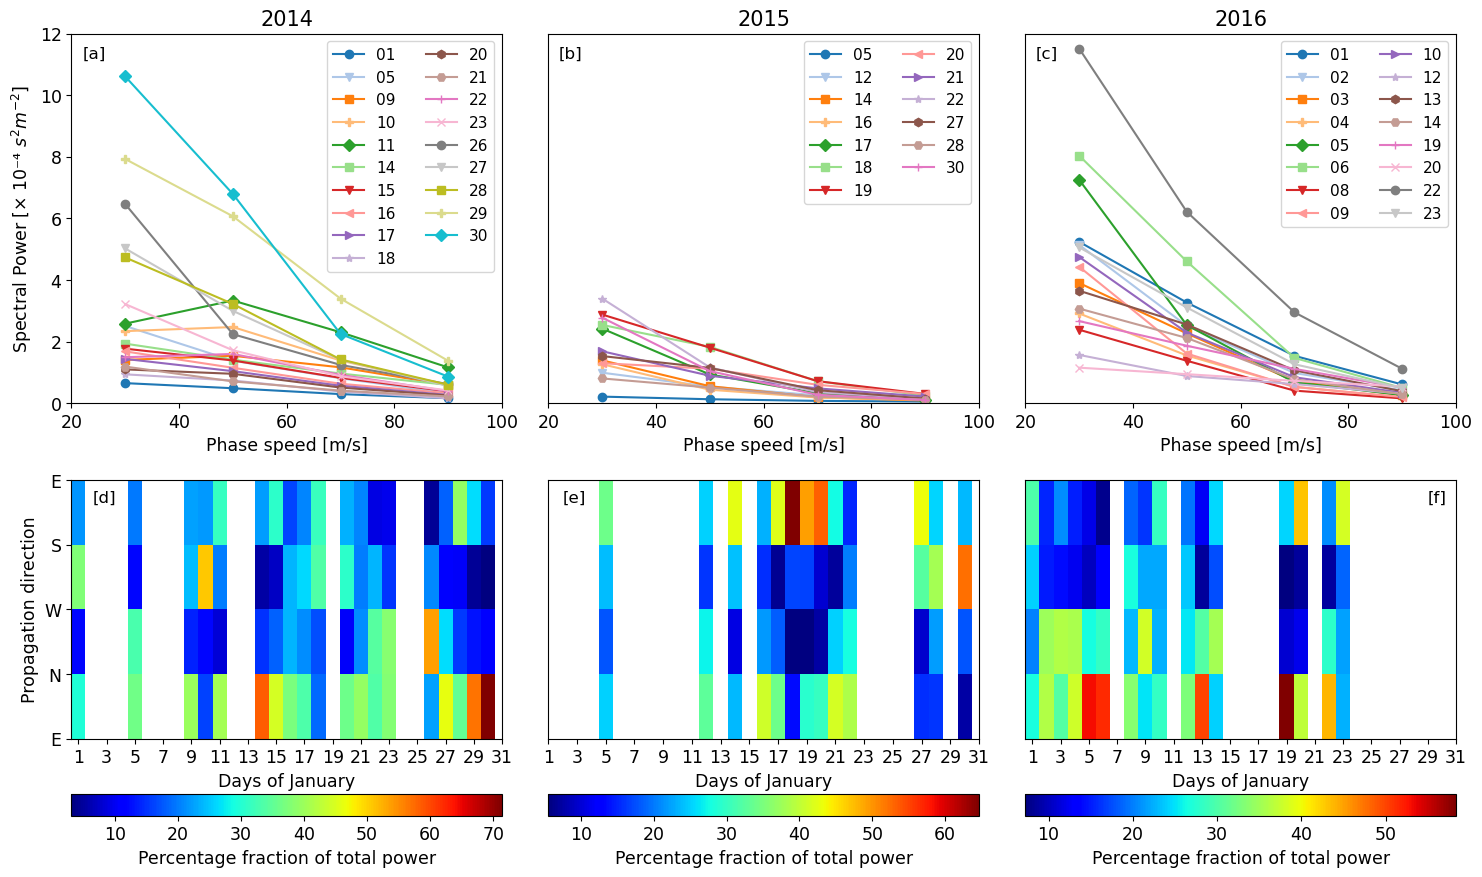

In [7]:
# Figure -5 : Day-to-day variability

## ==================== GW speeds and Angle of propagation information needed for visualisations of MT results ============== ## 

Vp_GW = np.arange(20, 120, 20)      # Speed domains for quantifications
Phi_GW = np.arange(0, 450, 90)      # Propagation directions for quantifications

x = np.arange(-150.,151.,1)
y = np.arange(-150.,151.,1)
x0 = np.zeros(301)
y0 = np.zeros(301)  
R = np.zeros((301,301))
Phi = np.zeros((301,301))
X,Y = np.meshgrid(x,y)

j = 0
k = 0
for j in range(len(x)):
    for k in range(len(y)):
        R[j,k] = np.sqrt((x[j])**2+(y[k])**2)
        theta = np.arctan2(y[k], x[j])
        theta_deg = np.degrees(theta)
        # Add 360 degrees if the angle is negative
        if theta_deg < 0: theta_deg += 360
        Phi[j,k] = theta_deg
        #print(x[j],   y[k],    Phi[j,k])

## ========== Primary directory path where to look for nightly_avergaed MT spectra =========== ##

base_path = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Daily Averaged M-Transform Spectra"

## ============== Nightly-Averaged-M-Transform output files of 2014 (numpy .npy files) =================== ##
print('================= Analyses for 2014 started =====================')
year = "_2014.npy"
dir_2014 = base_path

## Get a list of all files in the directory with the given extension

files_2014 = [f for f in os.listdir(dir_2014) if f.endswith(year)]
files_2014 = natsorted(files_2014)
#print(len(files_2014))
#print(files_2014)
#sys.exit()
PSD_Vp_2014 = np.zeros((len(files_2014),len(Vp_GW)-1))                 # Each days' PSD variation with speeds will be stored in different rows of this array
PSD_Phi_2014 = np.zeros((len(files_2014),len(Phi_GW)-1))               # Each days' PSD variation with propagation angle will be stored in different rows of this array
DOY_2014 = np.zeros(len(files_2014), dtype='int')
Tot_PSD_2014 = np.zeros(len(files_2014))                               # The sum of PSD for the entire M-Transform provided GW spectra will be stored in this array for 2014 
#print(PSD_Vp_2014.shape)

## ======================= Figure_Page_Set_Up ===================== ##
plt.rcParams.update({'font.size': 12.5})
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,9))

# increase the space between subplots
fig.subplots_adjust(hspace=0.2, wspace=0.1)

marker_list = ['o', 'v', 's', 'P', 'D', 's', 'v', '<', '>', '*', 'h', 'H', '+', 'x']

ax1_2014 = axs[0,0]
ax2_2014 = axs[1,0]

i = 0
for i in range(len(files_2014)):
    GW_file_2014 = os.path.join(dir_2014,files_2014[i])
    # File details: date, doy, etc.
    fname = files_2014[i]
    date = fname[3:13]
    d1 = fname[3:5]
    d2 = fname[6:8]
    yy = fname[9:13]
    day = d1
    #print('## Filename:: ',files_2014[i])
    #print('## Date:: ',date, ';  ## DOY:: ',d1, ';  ## year::',yy)
    
    # M-Transform GW Spectra is being read into a numpy array
    GW_dataset_2014 = np.load(GW_file_2014)
    GW_spectra_2014 = np.transpose(GW_dataset_2014)       ## IDL generated 2D array has (columns, row) structure by Python reads 2D array as (rows, columns)
    
    # The speeds less than 20 m/s are contaminated by the movement of Milkyway over the course of observation; therefore the spectral power for this part of the GW_spectra is being replaces with zero values

    R_lt20 = np.where(R <= 20)              # indices of GW_Spectra where speeds are less than or equal to 20 m/s
    
    # Replace values in GW_Spectra where R <= 20
    GW_spectra_2014[R_lt20] = -100.0            # GW_spectra has logarithmic values and they are plotted in colorscale; so instead of '0', '-100' has been used to be properly represented in the standard scales of M-Transform outputs  
   
    # Quantifying the MT GW Spectra by adding the sepctra powers in different speed and angle of propagation domains   
    
    all_PSD_2014 = (10.0**(GW_spectra_2014))*10.0**4                           # Values will be plotted in units of (10**-4)
    Tot_PSD_2014[i] = np.sum(all_PSD_2014)
    DOY_2014[i] = int(day)
    
    # (1) Spectral power in different speed ranges i.e., for values of R

    PSD_Vp = np.zeros(len(Vp_GW)-1)
     
    m = 0
    for m in range(len(Vp_GW)-1):
        R_indices = np.where((R >= Vp_GW[m]) & (R <= Vp_GW[m] + 20.))
        PSD_Vp_indices = (10.0**(GW_spectra_2014[R_indices]))*10.0**4                      # Values will be plotted in units of (10**-4) 
        PSD_Vp[m] = np.sum(PSD_Vp_indices)
        #print(m,Vp_GW[m],Vp_GW[m]+20,PSD_Vp[m])
    PSD_Vp_2014[i,:] = PSD_Vp                                                             # Each days' data is being stored in each row 
    #print(i, DOY_2014[i], PSD_Vp_2014[i,0])
    
    # (2) Spectral power in different rpopagation directions i.e., for values of Phi

    PSD_Phi = np.zeros(len(Phi_GW)-1)

    m = 0
    for m in range(len(Phi_GW)-1):
        Phi_indices = np.where((Phi >= Phi_GW[m]) & (Phi <= Phi_GW[m]+90.))
        PSD_Phi_indices = (10.0**(GW_spectra_2014[Phi_indices]))*10.0**4                   # Values will be plotted in units of (10**-4) 
        PSD_Phi[m] = 100.*(np.sum(PSD_Phi_indices)/Tot_PSD_2014[i])
        #print(m,   Phi_GW[m],    Phi_GW[m]+90.,      PSD_Phi[m])
    PSD_Phi_2014[i,:] = PSD_Phi                                                            # Each days' data is being stored in each row 
    #print(i, DOY_2014[i], Tot_PSD_2014[i])
    
    ## Figure - (a) :> PSD variation with speeds for 2014
    
    color = plt.cm.tab20(i) # choose a color from the 'tab10' colormap
    marker = marker_list[i % len(marker_list)]
    
    ax1_2014.plot([30,50,70,90], PSD_Vp_2014[i,:], color = color, marker = marker, label = day)    # {30,50,70,90} are the avaergae of the ranges of speeds used to add spectral power
    ax1_2014.set_title('2014')
    ax1_2014.set_ylabel('Spectral Power [$\\times$ 10\u207B\u2074 $s^2$$m^{-2}$]')
    ax1_2014.set_xlabel('Phase speed [m/s]')
    ax1_2014.set_xlim([20 , 100])
    ax1_2014.set_xticks([20,40,60,80,100])
    ax1_2014.set_ylim([0 , 12])
    ax1_2014.set_yticks([0,2,4,6,8,10,12])
    ax1_2014.legend(ncol=2, fontsize='11')
ax1_2014.text(22,11.2, "[a]", fontsize = 12, color = 'black')
    
# Figure - (b):> PSD variation with propagation direction for 2014   
# Directions
directions = [45, 135, 225, 315]#["E", "N", "W", "S"]

# PSD values will be consider as "0" for missing days in order to avoid confusion on missing days while showing colormap
doj_2014 = np.arange(min(DOY_2014), max(DOY_2014) + 1)

# Create a new array for PSD_Phi_2016 with zeros for missing days
zf_PSD_Phi_2014 = np.zeros((len(doj_2014), PSD_Phi_2014.shape[1]))

# Fill the new array with existing data
for i, day in enumerate(DOY_2014): zf_PSD_Phi_2014[doj_2014 == day, :] = PSD_Phi_2014[i, :]

# Replace zeros with NaN for missing days in the zero-filled arrays
zf_PSD_Phi_2014[zf_PSD_Phi_2014 == 0] = np.nan

# Create a meshgrid for the contour plot
Y, X = np.meshgrid(directions,  doj_2014)

contour = ax2_2014.pcolormesh(X, Y, zf_PSD_Phi_2014, cmap='jet')#, levels = np.linspace(0, 100, 11))#, vmin=0, vmax=100)
plt.colorbar(contour, ax=ax2_2014, orientation='horizontal', label='Percentage fraction of total power', pad = 0.15)#, ticks=np.linspace(0, 100, 11),)
#ax2_2014.set_title('2014')
ax2_2014.set_ylabel('Propagation direction')
ax2_2014.set_xlabel('Days of January')
ax2_2014.set_yticks(np.linspace(0, 360, 5))
ax2_2014.set_ylim([0,360])
ax2_2014.set_yticklabels(['E','N','W','S','E'])
ax2_2014.set_xticks(range(1, 33,2))
ax2_2014.text(2,330, "[d]",   fontsize = 12, color = 'black')
    
## ============== Nightly-Averaged-M-Transform output files of 2015 (numpy .npy files) =================== ##
print('================= Analyses for 2015 started =====================')

year = "_2015.npy"
dir_2015 = base_path

## Get a list of all files in the directory with the given extension
files_2015 = [f for f in os.listdir(dir_2015) if f.endswith(year)]
files_2015 = natsorted(files_2015)
#print(len(files_2015))
#print(files_2015)
#sys.exit()
PSD_Vp_2015 = np.zeros((len(files_2015),len(Vp_GW)-1))                 # Each days' PSD variation with speeds will be stored in different rows of this array
PSD_Phi_2015 = np.zeros((len(files_2015),len(Phi_GW)-1))               # Each days' PSD variation with propagation angle will be stored in different rows of this array
DOY_2015 = np.zeros(len(files_2015))
Tot_PSD_2015 = np.zeros(len(files_2015))                             # The sum of PSD for the entire M-Transform provided GW spectra will be stored in this array for 2015 

ax1_2015 = axs[0,1]
ax2_2015 = axs[1,1]

i = 0
for i in range(len(files_2015)):
    GW_file_2015 = os.path.join(dir_2015,files_2015[i])
    
    # File details: date, doy, etc.
    fname = files_2015[i]
    date = fname[3:13]
    d1 = fname[3:5]
    d2 = fname[6:8]
    yy = fname[9:13]
    day = d1
    #print('## Filename:: ',files_2015[i])
    #print('## Date:: ',date, ';  ## DOY:: ',d1, ';  ## year::',yy)
    
    # M-Transform GW file is being read into a numpy array
    GW_dataset_2015 = np.load(GW_file_2015)
    GW_spectra_2015 = np.transpose(GW_dataset_2015)       ## IDL generated 2D array has (columns, row) structure by Python reads 2D array as (rows, columns)
    
    # The speeds less than 20 m/s are contaminated by the movement of Milkyway over the course of observation; therefore the spectral power for this part of the GW_spectra is being replaces with zero values

    R_lt20 = np.where(R <= 20)              # indices of GW_Spectra where speeds are less than or equal to 20 m/s
    
    # Replace values in GW_Spectra where R <= 20
    GW_spectra_2015[R_lt20] = -100.0            # GW_spectra has logarithmic values and they are plotted in colorscale; so instead of '0', '-100' has been used to be properly represented in the standard scales of M-Transform outputs  
    # print(GW_spectra_2015.shape)
    
    # Quantifying the MT GW Spectra by adding the sepctra powers in different speed and angle of propagation domains   
    
    all_PSD_2015 = (10.0**(GW_spectra_2015))*10.0**4                           # Values will be plotted in units of (10**-4)
    Tot_PSD_2015[i] = np.sum(all_PSD_2015)
    DOY_2015[i] = int(day)
    
    # (1) Spectral power in different speed ranges i.e., for values of R
    
    PSD_Vp = np.zeros(len(Vp_GW)-1)
     
    m = 0
    for m in range(len(Vp_GW)-1):
        R_indices = np.where((R >= Vp_GW[m]) & (R <= Vp_GW[m] + 20.))
        PSD_Vp_indices = (10.0**(GW_spectra_2015[R_indices]))*10.0**4                      # Values will be plotted in units of (10**-4) 
        PSD_Vp[m] = np.sum(PSD_Vp_indices)
        #print(m,Vp_GW[m],Vp_GW[m]+20,PSD_Vp[m])
    PSD_Vp_2015[i,:] = PSD_Vp                                                             # Each days' data is being stored in each row 
    #print(i, DOY_2015[i], PSD_Vp_2015[i,0])
    
    # (2) Spectral power in different rpopagation directions i.e., for values of Phi

    PSD_Phi = np.zeros(len(Phi_GW)-1)

    m = 0
    for m in range(len(Phi_GW)-1):
        Phi_indices = np.where((Phi >= Phi_GW[m]) & (Phi <= Phi_GW[m]+90.))
        PSD_Phi_indices = (10.0**(GW_spectra_2015[Phi_indices]))*10.0**4                   # Values will be plotted in units of (10**-4) 
        PSD_Phi[m] = 100.*(np.sum(PSD_Phi_indices)/Tot_PSD_2015[i])
        #print(m,   Phi_GW[m],    Phi_GW[m]+90.,      PSD_Phi[m])
    PSD_Phi_2015[i,:] = PSD_Phi                                                            # Each days' data is being stored in each row 
    #print(i, DOY_2015[i], PSD_Vp_2015[0,i])
    
    # Figure - (b) :> PSD variation with speeds for 2015
    
    color = plt.cm.tab20(i) # choose a color from the 'tab10' colormap
    marker = marker_list[i % len(marker_list)]
    ax1_2015.plot([30,50,70,90], PSD_Vp_2015[i,:], color = color, marker = marker, label = day)    # {30,50,70,90} are the avaergae of the ranges of speeds used to add spectral power
    ax1_2015.set_title('2015')
    #ax1_2015.set_ylabel('Spectral Power (x10\u207B\u2074)')
    ax1_2015.set_xlabel('Phase speed [m/s]')
    ax1_2015.set_xlim([20 , 100])
    ax1_2015.set_xticks([20,40,60,80,100])
    ax1_2015.set_ylim([0 , 12])
    ax1_2015.set_yticks([])#0,2,4,6,8,10,12])
    ax1_2015.legend(ncol=2, fontsize='11')
ax1_2015.text(22,11.2, "[b]",   fontsize = 12, color = 'black')
    
# Figure - (e) :> PSD variation with propagation direction for 2015
    
# Directions
directions = [45, 135, 225, 315]#["E", "N", "W", "S"]

# PSD values will be consider as "0" for missing days in order to avoid confusion on missing days while showing colormap
doj_2015 = np.arange(min(DOY_2015), max(DOY_2015) + 1)

# Create a new array for PSD_Phi_2016 with zeros for missing days
zf_PSD_Phi_2015 = np.zeros((len(doj_2015), PSD_Phi_2015.shape[1]))

# Fill the new array with existing data
for i, day in enumerate(DOY_2015): zf_PSD_Phi_2015[doj_2015 == day, :] = PSD_Phi_2015[i, :]

# **Modified Here**: Replace zeros with NaN for missing days in the zero-filled arrays
zf_PSD_Phi_2015[zf_PSD_Phi_2015 == 0] = np.nan

# Create a meshgrid for the contour plot
Y, X = np.meshgrid(directions,  doj_2015)

# Create the contour plot
contour = ax2_2015.pcolormesh(X, Y, zf_PSD_Phi_2015, cmap='jet')#, levels = np.linspace(0, 100, 11))#, vmin=0, vmax=100)
plt.colorbar(contour, ax=ax2_2015, orientation='horizontal', label='Percentage fraction of total power', pad = 0.15)#, ticks=np.linspace(0, 100, 11),)
#ax2_2015.set_title('2015')
#ax2_2015.set_ylabel('Propagation direction')
ax2_2015.set_xlabel('Days of January')
#ax2_2015.set_yticks(np.linspace(0, 360, 5))
ax2_2015.set_ylim([0,360])
ax2_2015.set_yticks([])#0,2,4,6,8,10,12])
#ax2_2015.set_yticklabels(['E','N','W','S','E'])
ax2_2015.set_xticks(range(1, 33,2))
ax2_2015.text(2,330, "[e]",  fontsize = 12, color = 'black')
    
## ============== Nightly-Averaged-M-Transform output files of 2016 (numpy .npy files) =================== ##

print('================= Analyses for 2016 started =====================')
year = "_2016.npy"
dir_2016 = base_path

## Get a list of all files in the directory with the given extension

files_2016 = [f for f in os.listdir(dir_2016) if f.endswith(year)]
files_2016 = natsorted(files_2016)
#print(len(files_2016))
#print(files_2016)
#sys.exit()

PSD_Vp_2016 = np.zeros((len(files_2016),len(Vp_GW)-1))                 # Each days' PSD variation with speeds will be stored in different rows of this array
PSD_Phi_2016 = np.zeros((len(files_2016),len(Phi_GW)-1))               # Each days' PSD variation with propagation angle will be stored in different rows of this array
DOY_2016 = np.zeros(len(files_2016))
Tot_PSD_2016 = np.zeros(len(files_2016))                             # The sum of PSD for the entire M-Transform provided GW spectra will be stored in this array for 2016

ax1_2016 = axs[0,2]
ax2_2016 = axs[1,2]

i = 0
for i in range(len(files_2016)):
    GW_file_2016 = os.path.join(dir_2016,files_2016[i])
    
    # File details: date, doy, etc.
    fname = files_2016[i]
    date = fname[3:13]
    d1 = fname[3:5]
    d2 = fname[6:8]
    yy = fname[9:13]
    day = d1
    #print('## Filename:: ', files_2016[i])
    #print('## Date:: ',date, ';  ## DOY:: ',d1, ';  ## year::',yy)
    
    # M-Transform GW file is being read into a numpy array
    GW_dataset_2016 = np.load(GW_file_2016)
    GW_spectra_2016 = np.transpose(GW_dataset_2016)       ## IDL generated 2D array has (columns, row) structure by Python reads 2D array as (rows, columns)
    
    # The speeds less than 20 m/s are contaminated by the movement of Milkyway over the course of observation; therefore the spectral power for this part of the GW_spectra is being replaces with zero values
    R_lt20 = np.where(R <= 20)              # indices of GW_Spectra where speeds are less than or equal to 20 m/s
   
    # Replace values in GW_Spectra where R <= 20
    GW_spectra_2016[R_lt20] = -100.0            # GW_spectra has logarithmic values and they are plotted in colorscale; so instead of '0', '-100' has been used to be properly represented in the standard scales of M-Transform outputs  
    # print(GW_spectra_2015.shape)
       
    # Quantifying the MT GW Spectra by adding the sepctra powers in different speed and angle of propagation domains   
    
    all_PSD_2016 = (10.0**(GW_spectra_2016))*10.0**4                           # Values will be plotted in units of (10**-4)
    Tot_PSD_2016[i] = np.sum(all_PSD_2016)
    DOY_2016[i] = int(day)
    
    # (1) Spectral power in different speed ranges i.e., for values of R
        
    PSD_Vp = np.zeros(len(Vp_GW)-1)
     
    m = 0
    for m in range(len(Vp_GW)-1):
        R_indices = np.where((R >= Vp_GW[m]) & (R <= Vp_GW[m] + 20.))
        PSD_Vp_indices = (10.0**(GW_spectra_2016[R_indices]))*10.0**4                      # Values will be plotted in units of (10**-4) 
        PSD_Vp[m] = np.sum(PSD_Vp_indices)
        #print(m,Vp_GW[m],Vp_GW[m]+20,PSD_Vp[m])
    PSD_Vp_2016[i,:] = PSD_Vp                                                             # Each days' data is being stored in each row 
    #print(i, DOY_2016[i], PSD_Vp_2016[i,0])
    #print(DOY_2016[i], '==============', PSD_Vp_2016[i,:])
    # (2) Spectral power in different rpopagation directions i.e., for values of Phi

    PSD_Phi = np.zeros(len(Phi_GW)-1)

    m = 0
    for m in range(len(Phi_GW)-1):
        Phi_indices = np.where((Phi >= Phi_GW[m]) & (Phi <= Phi_GW[m]+90.))
        PSD_Phi_indices = (10.0**(GW_spectra_2016[Phi_indices]))*10.0**4                   # Values will be plotted in units of (10**-4) 
        PSD_Phi[m] = 100.*(np.sum(PSD_Phi_indices)/Tot_PSD_2016[i])
        #print(m,   Phi_GW[m],    Phi_GW[m]+90.,      PSD_Phi[m])
    PSD_Phi_2016[i,:] = PSD_Phi                                                            # Each days' data is being stored in each row 
    #print(i, DOY_2016[i], Tot_PSD_2016[i])
    
    # Figure - (c) :> PSD variation with speeds for 2016
    
    color = plt.cm.tab20(i) # choose a color from the 'tab10' colormap
    marker = marker_list[i % len(marker_list)]
    ax1_2016.plot([30,50,70,90], PSD_Vp_2016[i,:], color = color, marker = marker, label = day)    # {30,50,70,90} are the avaergae of the ranges of speeds used to add spectral power
    ax1_2016.set_title('2016')
    #ax1_2016.set_ylabel('Spectral Power (x10\u207B\u2074)')
    ax1_2016.set_xlabel('Phase speed [m/s]')
    ax1_2016.set_xlim([20 , 100])
    ax1_2016.set_xticks([20,40,60,80,100])
    ax1_2016.set_ylim([0 , 12])
    ax1_2016.set_yticks([])#0,2,4,6,8,10,12])
    ax1_2016.legend(ncol=2, fontsize='11')
ax1_2016.text(22,11.2, "[c]",  fontsize = 12, color = 'black')
    
# Figure - (f) :> PSD variation with propagation direction for 2016
    
# Directions
directions = [45, 135, 225, 315]#["E", "N", "W", "S"]

# PSD values will be consider as "0" for missing days in order to avoid confusion on missing days while showing colormap
doj_2016 = np.arange(min(DOY_2016), max(DOY_2016) + 1)

# Create a new array for PSD_Phi_2016 with zeros for missing days
zf_PSD_Phi_2016 = np.zeros((len(doj_2016), PSD_Phi_2016.shape[1]))

# Fill the new array with existing data
for i, day in enumerate(DOY_2016): zf_PSD_Phi_2016[doj_2016 == day, :] = PSD_Phi_2016[i, :]

# **Modified Here**: Replace zeros with NaN for missing days in the zero-filled arrays
zf_PSD_Phi_2016[zf_PSD_Phi_2016 == 0] = np.nan

# Create a meshgrid for the contour plot
Y, X = np.meshgrid(directions,  doj_2016)

# Create the contour plot
contour = ax2_2016.pcolormesh(X, Y, zf_PSD_Phi_2016, cmap='jet')#, levels = np.linspace(0, 100, 11))#, vmin=0, vmax=100)
plt.colorbar(contour, ax=ax2_2016, orientation='horizontal', label='Percentage fraction of total power', pad = 0.15)#, ticks=np.linspace(0, 100, 11),)
#ax2_2016.set_title('2016')
#ax2_2016.set_ylabel('Propagation direction')
ax2_2016.set_xlabel('Days of January')
#ax2_2016.set_yticks(np.linspace(0, 360, 5))
ax2_2016.set_ylim([0,360])
ax2_2016.set_yticks([])#0,2,4,6,8,10,12])
#ax2_2016.set_yticklabels(['E','N','W','S','E'])
ax2_2016.set_xticks(range(1, 33,2))
ax2_2016.text(29,330, "[f]",  fontsize = 12, color = 'black')
plt.tight_layout()
plt.show()

## Set the filename for the output file and saving the image
Image = (r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_5_day-to-day_variability.png")
fig.savefig(Image, bbox_inches='tight', dpi=300)

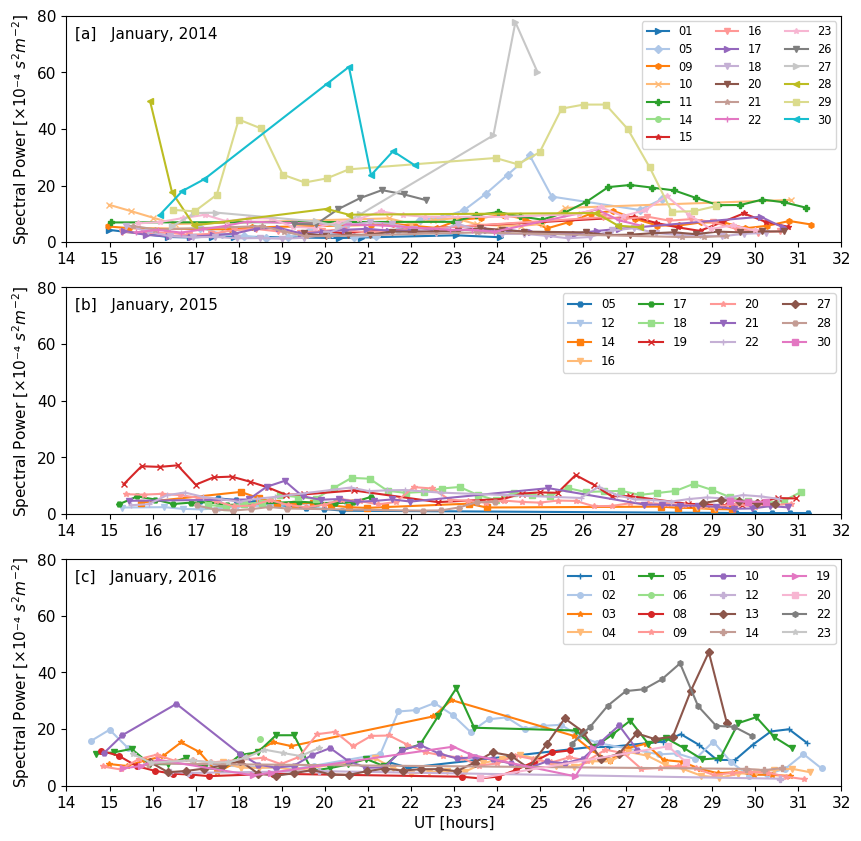

In [11]:
# Figure - 6 : Intraday variability

years = ['2014', '2015', '2016']

# Create a figure with 3 subplots in 3 rows
fig, axs = plt.subplots(len(years), 1, figsize = (10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
plt.rcParams.update({'font.size': 11})
marker_list = ['o', 'v', 's', 'P', 'D', 's', 'v', '<', '>', '*', 'h', 'H', '+', 'x']

x = np.arange(-150., 151., 1)
y = np.arange(-150., 151., 1)
x0 = np.zeros(301)
y0 = np.zeros(301)
R = np.zeros((301, 301))
Phi = np.zeros((301, 301))
X, Y = np.meshgrid(x, y)

for j in range(len(x)):
    for k in range(len(y)):
        R[j, k] = np.sqrt((x[j])**2 + (y[k])**2)
        theta = np.arctan2(y[k], x[j])
        theta_deg = np.degrees(theta)
        if theta_deg < 0:
            theta_deg += 360
        Phi[j, k] = theta_deg

def extract_image_numbers(GW_file):
    pattern = r'\((\d+)_to_(\d+)\)'
    match = re.search(pattern, GW_file)
    im1 = match.group(1)
    im2 = match.group(2)
    imnum = float(im1) + 45
    return im1, im2, imnum

def get_subfolders(parent_directory):
    subfolders = [folder.name for folder in os.scandir(parent_directory) if folder.is_dir()]
    return subfolders

for j, year in enumerate(years):
    ax = axs[j]
    
    base_dir = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Intraday_M_Transform_Spectra"
    img_time_dir = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Image_numbers_to_UT_times"
    parent_directory = os.path.join(base_dir, year)
    subfolder_names = get_subfolders(parent_directory)
    subfolder_names = natsorted(subfolder_names)
    #print(subfolder_names)
    #sys.exit()
    
    m = 0
    
    for subfolder_name in subfolder_names:
        subfolder_path = os.path.join(parent_directory, subfolder_name)
        img_time_file = os.path.join(img_time_dir, f'{subfolder_name}.txt')
        #print(subfolder_path)
        #print(img_time_file)
        #sys.exit()
        
        df = pd.read_csv(img_time_file, sep=r'\s+')
        img_num = df['Image_Number']
        img_time = df['UT(Hrs)']
        
        image_num = np.array(img_num)
        image_time = np.array(img_time)
        
        dir_path = subfolder_path
        extension = ".sav"
        file_list = [f for f in os.listdir(dir_path) if f.endswith(extension)]
        file_list = natsorted(file_list)
        #print(file_list)
        #sys.exit()
        
        x = np.zeros(len(file_list))
        y = np.zeros(len(file_list))
        
        for i in range(len(file_list)):
            GW_file = os.path.join(dir_path, file_list[i])
            #print(f"File path length: {len(GW_file)}")
            
            im1, im2, imnum = extract_image_numbers(GW_file)
            imnum_time = image_time[np.where(image_num == imnum)][0]
            #print(f"Attempting to read file: {GW_file}")  # Debug print statement
            #sys.exit()
            
            GW_dataset = readsav(GW_file)
            GW_spectra = GW_dataset['result']
            GW_spectra = np.array(GW_spectra, copy=True)
            GW_spectra.setflags(write=True)
            GW_spectra = np.transpose(GW_spectra)
            R_lt20 = np.where(R <= 20)
            GW_spectra[R_lt20] = -100.0
            
            PSD = (10.0**GW_spectra) * 10.0**4
            GW_Power = np.sum(PSD)
            x[i] = imnum_time
            y[i] = GW_Power
            
        x = x[x != 0]
        y = y[y != 0]
        
        ax.plot(x, y, color=plt.cm.tab20(m), marker=marker_list[i % len(marker_list)], markersize=4, label=subfolder_name[3:5])
        ax.set_xlim([14, 32])
        ax.set_ylim([0, 80])
        ax.set_xticks(range(14, 33, 1))
        ax.set_ylabel('Spectral Power [$\\times $10\u207B\u2074 $s^2$$m^{-2}$]')
        #ax.legend(ncol=4, fontsize='9')
        if j == 0: ax.legend(ncol=3, fontsize='8.2', loc='upper right')
        if j == 1: ax.legend(ncol=4, fontsize='8.5', loc='upper right')
        if j == 2: ax.legend(ncol=4, fontsize='8.5', loc='upper right')
        
        m += 1
    if j == 0:
        ax.text(14.2, 72, "[a]   January, 2014", fontsize=11, color='black')
    if j == 1:
        ax.text(14.2, 72, "[b]   January, 2015", fontsize=11, color='black')
    if j == 2:
        ax.text(14.2, 72, "[c]   January, 2016", fontsize=11, color='black')
        ax.set_xlabel('UT [hours]')
plt.show()

Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_6_intraday_variability.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)

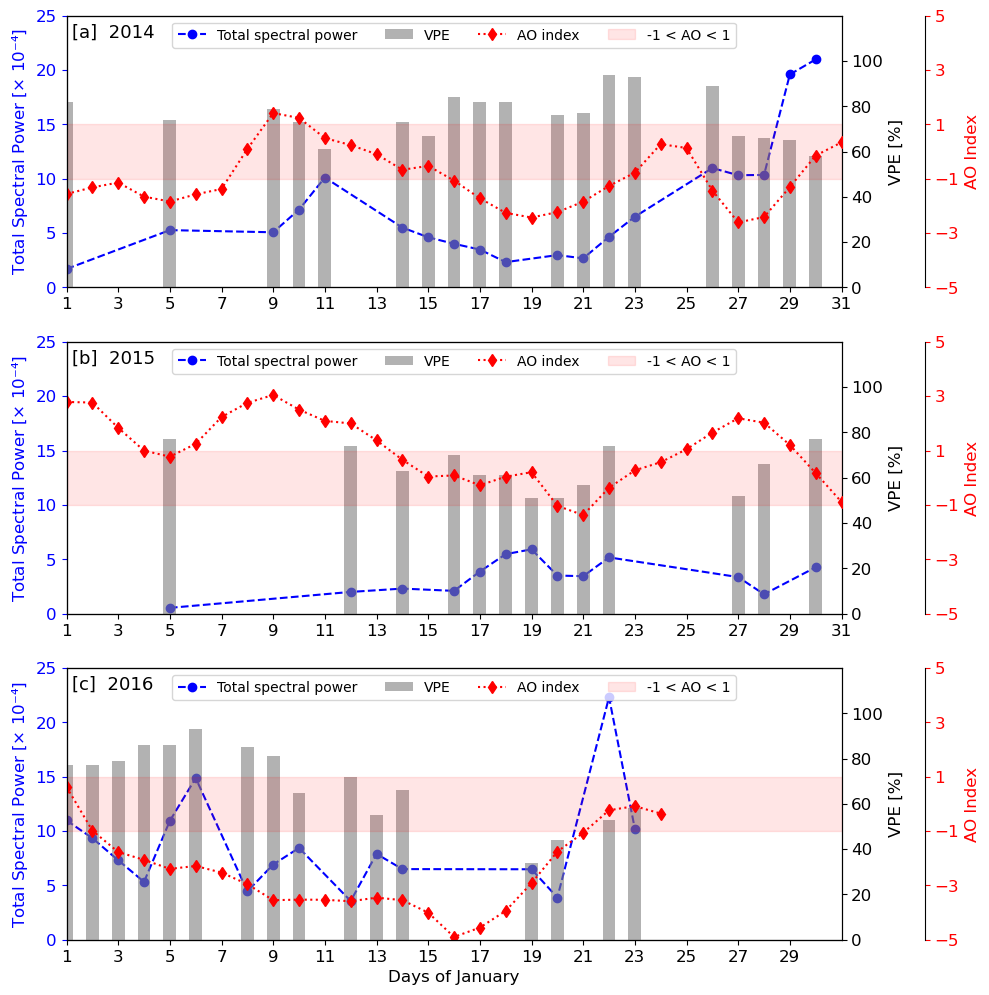

In [12]:
# Figure - 7 : Comparison of AO, VPE, and Spectral Power

## Stratospheric condition :: Read AO index in .csv format for the same period of 2014/2015/2016
AO_index_file = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\norm.daily.ao.cdas.z1000.19500101_current.csv"

AO_index = pd.read_csv(AO_index_file, delimiter=",")#, skiprows = 1)  ## '#' removes the comment line; each headers must not have space in between letters, else dataframe can't read them properly!! 

AO_year = AO_index['year'].values
AO_month = AO_index['month'].values
AO_doy = AO_index['day'].values
AO_values = AO_index['ao_index_cdas'].values

# Identify the indices where Year is 2014, 2015, or 2016 and DoY is between 1 and 31 (for January)
AO_indices = np.where((AO_year >= 2014) & (AO_year <= 2016) & (AO_month == 1) & (AO_doy >= 1) & (AO_doy <= 31))

AO_year_extracted = AO_year[AO_indices]
AO_month_extracted = AO_month[AO_indices]
AO_doy_extracted = AO_doy[AO_indices]
AO_index_extracted = AO_values[AO_indices]
#print(AO_year_extracted[62:-1])

AO_Jan2014 = AO_index_extracted[0:31]
AO_Jan2015 = AO_index_extracted[31:62]
AO_Jan2016 = AO_index_extracted[62:86]
AO_doj = AO_doy_extracted[62:93]
AO_doj_2016 = AO_doy_extracted[62:86]
#print(AO_doj)
#sys.exit()

# VPE values: ## Import the text files containing vertical propagation percentages from wind block diagrams

file_2014 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2014-January_vertical_propagation_efficiency.txt"
file_2015 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2015-January_vertical_propagation_efficiency.txt"
file_2016 = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\VPE_of_AGWs\2016-January_vertical_propagation_efficiency.txt"

# Read the data from the txt file into a DataFrame :: Skip the first row to start reading from the headers, and use whitespace as the delimiter

df_2014 = pd.read_csv(file_2014, skiprows=1, sep=r'\s+')
df_2015 = pd.read_csv(file_2015, skiprows=1, sep=r'\s+')
df_2016 = pd.read_csv(file_2016, skiprows=1, sep=r'\s+')

# Extract the 'DOJ_{year}' column for the X-axis labels and '0-50km(%)' column for Y-axis values

doj_2014 = df_2014['DOJ_2014'].apply(lambda x: int(x[0:2]))
GW_PSD_2014 = df_2014['GW_power(/10**4)']
VPP_0_50_2014 = df_2014['0-50km(%)']

doj_2015 = df_2015['DOJ_2015'].apply(lambda x: int(x[0:2]))
GW_PSD_2015 = df_2015['GW_power(/10**4)']
VPP_0_50_2015 = df_2015['0-50km(%)']

doj_2016 = df_2016['DOJ_2016'].apply(lambda x: int(x[0:2]))
GW_PSD_2016 = df_2016['GW_power(/10**4)']
VPP_0_50_2016 = df_2016['0-50km(%)']

## Plot these results in 3 figures: 2014, 2015, and 2016

plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 12))

# Figure - 1 :: 2014 :> GW_Power & efficiency from Wind_blocking_results vs AO index

# To plot GW Power
ax = axs[0]
ax.tick_params(axis='y', colors='blue')
ax.plot(doj_2014, GW_PSD_2014, color = 'blue', marker = 'o', linestyle = '--', label = 'Total spectral power')
ax.set_ylabel('Total Spectral Power [$\\times$ 10\u207B\u2074]', color = 'blue')
ax.set_xlim([1, 31])
ax.set_xticks(range(1, 33,2))
ax.set_ylim([0,25])
ax.text(1.2,23, "[a]  2014", fontsize = 13, color = 'black')

# To plot GW vertical propagation efficiency 
ax1 = ax.twinx()
ax1.set_ylim([0,120])
ax1.set_yticks(range(0,120,20))
ax1.set_ylabel('VPE [%]')
ax1.bar(doj_2014, VPP_0_50_2014, width=0.5, color='grey', alpha=0.6, label='VPE')

# To plot AO index
ax2 = ax.twinx()
ax2.spines['right'].set_position(('outward', 60))
ax2.tick_params(axis='y', colors='red')
ax2.plot(AO_doj,AO_Jan2014, color = 'red', marker = 'd', ls = ':', label = 'AO index')
ax2.set_ylim([-5,5])
ax2.set_yticks(range(-5, 7, 2))
ax2.set_ylabel('AO Index', color = 'red')
ax2.axhspan(-1, 1, color='red', alpha=0.1, label = '-1 < AO < 1')

# Get lines and labels for legend from both ax, ax1, & ax2
lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Create a unified legend using the combined lines and labels
ax.legend(lines + lines1 + lines2, labels + labels1 + labels2, ncol = 4, fontsize = 10, loc='upper center')

# Figure - 2 :: 2015 :> GW_Power & efficiency from Wind_blocking_results vs AO index

# To plot GW Power
ax = axs[1]
ax.tick_params(axis='y', colors='blue')
ax.plot(doj_2015, GW_PSD_2015, color = 'blue', marker = 'o', linestyle = '--', label = 'Total spectral power')
ax.set_ylabel('Total Spectral Power [$\\times$ 10\u207B\u2074]', color = 'blue')
ax.set_xlim([1, 31])
ax.set_xticks(range(1, 33, 2))
ax.set_ylim([0,25])
ax.text(1.2,23, "[b]  2015", fontsize = 13, color = 'black')

# To plot GW vertical propagation efficiency 
ax1 = ax.twinx()
ax1.set_ylim([0,120])
ax1.set_yticks(range(0,120,20))
ax1.set_ylabel('VPE [%]')
ax1.bar(doj_2015, VPP_0_50_2015, width=0.5, color='grey', alpha=0.6, label='VPE')

# To plot AO index
ax2 = ax.twinx()
ax2.spines['right'].set_position(('outward', 60))
ax2.tick_params(axis='y', colors='red')
ax2.plot(AO_doj,AO_Jan2015, color = 'red', marker = 'd', ls = ':', label = 'AO index')
ax2.set_ylim([-5,5])
ax2.set_yticks(range(-5, 7, 2))
ax2.set_ylabel('AO Index', color = 'red')
ax2.axhspan(-1, 1, color='red', alpha=0.1, label = '-1 < AO < 1')

# Get lines and labels for legend from both ax, ax1, & ax2
lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Create a unified legend using the combined lines and labels
ax.legend(lines + lines1 + lines2, labels + labels1 + labels2, ncol = 4, fontsize = 10, loc='upper center')

# Figure - 3 :: 2016 :> GW_Power & efficiency from Wind_blocking_results vs AO index

# To plot GW Power
ax = axs[2]
ax.tick_params(axis='y', colors='blue')
ax.plot(doj_2016, GW_PSD_2016, color = 'blue', marker = 'o', linestyle = '--', label = 'Total spectral power')
ax.set_ylabel('Total Spectral Power [$\\times$ 10\u207B\u2074]', color = 'blue')
ax.set_xlim([1, 31])
ax.set_xlabel('Days of January')
ax.set_xticks(range(1, 31, 2))
ax.set_ylim([0,25])
ax.text(1.2,23, "[c]  2016", fontsize = 13, color = 'black')

# To plot GW vertical propagation efficiency 
ax1 = ax.twinx()
ax1.set_ylim([0,120])
ax1.set_yticks(range(0,120,20))
ax1.set_ylabel('VPE [%]')
ax1.bar(doj_2016, VPP_0_50_2016, width=0.5, color='grey', alpha=0.6, label='VPE')

# To plot AO index
ax2 = ax.twinx()
ax2.spines['right'].set_position(('outward', 60))
ax2.tick_params(axis='y', colors='red')
ax2.plot(AO_doj_2016, AO_Jan2016, color = 'red', marker = 'd', ls = ':', label = 'AO index')
ax2.set_ylim([-5,5])
ax2.set_yticks(range(-5, 7, 2))
ax2.set_ylabel('AO Index', color = 'red')
ax2.axhspan(-1, 1, color='red', alpha=0.1, label = '-1 < AO < 1')

# Get lines and labels for legend from both ax, ax1, & ax2
lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Create a unified legend using the combined lines and labels
ax.legend(lines + lines1 + lines2, labels + labels1 + labels2, ncol = 4, fontsize = 10, loc='upper center')

## Set the filename for the output file and saving the image
Image = r"C:\Users\subman\OneDrive - NERC\Work_at_BAS_Subir\MesoS2D\AMTM_ALOMAR\Paper-1_January_2014_2015_2016\Manuscript_Submission\SI files\Figures_for_Manuscript\figure_7_AGW_power_VPE_&_AO.png"
fig.savefig(Image, bbox_inches='tight', dpi=300)
